# Do the Number of Car Crashes in California Differ by Day of Month?

## Motivation

We want to examine whether or not there is some sort of seasonality with regards to car crashes; that is, is there a difference in the level of car crashes based on the day of the month (i.e., does the beginning of the month have more car crashes?), or based on the month of the year (i.e., do winter months correspond to more car crashes)? 

This could provide some insight into whether or not some trends exist that could explain any underlying differences in the average number of car crashes. For instance, are winter months more dangerous due to colder weather? 

## Data Preparation

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# our own package

from analysis import day_of_month

In [2]:
# relative path to data & figures directory
from paths import DATA_PATH, FIGURES_PATH

Note that we have to specify reading in the columns as floats because the data stores some columns as floats, some as ints.

In [4]:
# reading in data

time = pd.read_excel(f"{DATA_PATH}/time_2019.xlsx", header = 3, index_col = 0, 
                     dtype = {'Jan': np.float64, 'Feb': np.float64, 'Mar': np.float64, 'Apr': np.float64, 'May': np.float64,
                            'Jun': np.float64, 'Jul': np.float64, 'Aug': np.float64, 'Sep': np.float64,
                              'Oct': np.float64, 'Nov': np.float64, 'Dec': np.float64, 'Total': np.float64}) # same data type
time.head()

Jan   Feb   Mar   Apr   May  Jun   Jul   Aug   Sep   Oct   Nov  \
Day of Month                                                                    
1             14.0   9.0  11.0   7.0  15.0  9.0  11.0  15.0  10.0   7.0  18.0   
2              8.0  11.0   5.0   6.0  12.0  7.0   5.0  13.0  24.0  10.0  19.0   
3              9.0   5.0  10.0   5.0  10.0  9.0   7.0  11.0   8.0  13.0   6.0   
4              6.0   8.0   6.0   9.0  14.0  6.0  16.0  24.0   9.0  17.0   5.0   
5             10.0  12.0   6.0  13.0  13.0  7.0  16.0   8.0   7.0  11.0  13.0   

               Dec  Total  
Day of Month               
1             11.0  137.0  
2             14.0  134.0  
3              8.0  101.0  
4              8.0  128.0  
5             14.0  130.0

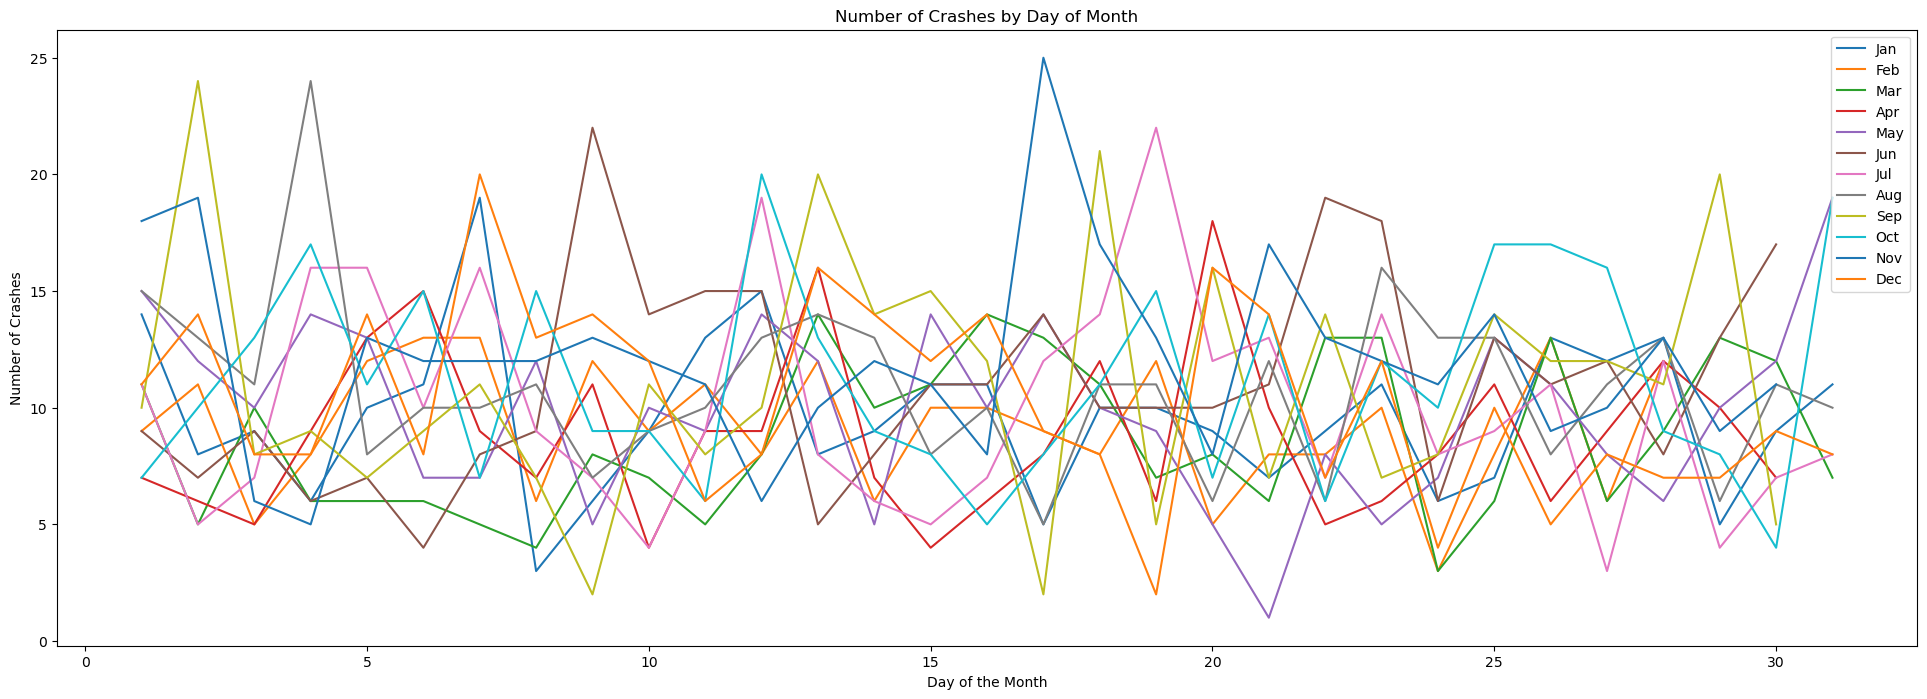

In [5]:
# plotting the data

plt.figure(figsize = (24, 8))
plt.plot(time.index[:-1], time.iloc[:-1, :-1], label = time.columns[:-1])
plt.xlabel('Day of the Month')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Day of Month')
plt.legend(loc = 'upper right')
plt.savefig(f"{FIGURES_PATH}/fatal_crashes_by_day_of_month.png")

As we can see, our data is quite messy when plotted as is! This is a big reason why we want to group our data and use a difference in means calculation.

## Seasonality Analysis for Day of Month

We first examine the seasonality based on day of month.

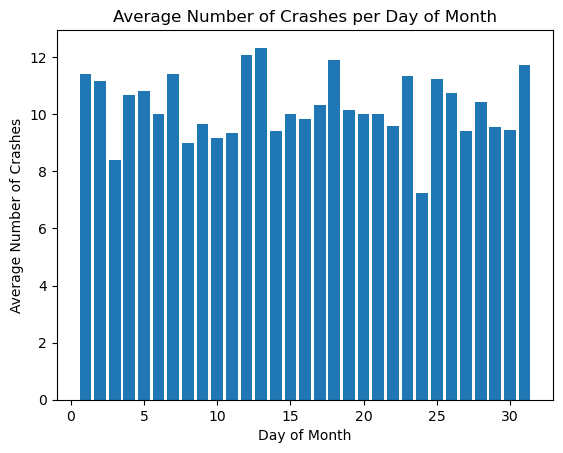

In [7]:
# showing the mean of the day of the month  

mean_crashes = day_of_month.find_mean(time)
plt.xlabel('Day of Month')
plt.ylabel('Average Number of Crashes')
plt.title('Average Number of Crashes per Day of Month')
plt.bar(mean_crashes.index, mean_crashes.values)
plt.savefig(f"{FIGURES_PATH}/avg_fatal_crashes_by_day_of_month.png")

To decide whether or not the means of each day of the month's car crashes are different, we can employ the Kruskal-Wallis test. The Kruskal-Wallis test is a nonparametric test--meaning we make no assumptions about the distributions of our observations--that allows us to test if the means of each of our groups are the same. The only assumptions made with the Kruskal-Wallis test is that we have independent observations; that is, car crashes are independent of one another. For the most part, this seems like a reasonable assumption, considering that a car crash happening somewhere in LA doesn't affect one in SF. Naturally, there are exceptions (i.e., a pileup), but we will consider this assumption on the macro scale to be feasible.

$H_0$: The population mean of each group is the same (the day of month doesn't change the number of car crashes)<br>
$H_1$: The population mean of each group is different (the day of month does change the number of car crashes)

In [8]:
# determining if the difference in means is significant

st.kruskal(mean_crashes.values[0], mean_crashes.values[1], mean_crashes.values[2], mean_crashes.values[3], 
           mean_crashes.values[4], mean_crashes.values[5], mean_crashes.values[6], mean_crashes.values[7], 
           mean_crashes.values[8], mean_crashes.values[9], mean_crashes.values[10], mean_crashes.values[11],
           mean_crashes.values[12], mean_crashes.values[13], mean_crashes.values[14], mean_crashes.values[15], 
           mean_crashes.values[16], mean_crashes.values[17], 
           mean_crashes.values[18], mean_crashes.values[19], mean_crashes.values[20], mean_crashes.values[21], 
           mean_crashes.values[22], mean_crashes.values[23], mean_crashes.values[24], mean_crashes.values[25], 
           mean_crashes.values[26], mean_crashes.values[27], mean_crashes.values[28], mean_crashes.values[29], 
           mean_crashes.values[30])  # need to separate each mean for kruskal test to work

KruskalResult(statistic=29.999999999999996, pvalue=0.46565370894401004)

With a p-value of 0.456, we fail to reject our null hypothesis, which means that we believe that our means are the same, and that the day of month doesn't change the number of car crashes. 

## Seasonality Analysis by Month

We now examine whether or not there is a difference based on the month of the year.

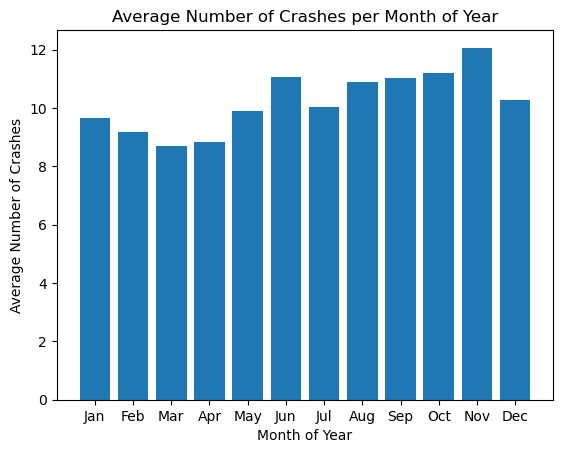

In [11]:
mean_months = day_of_month.find_mean(time, by_row = False)
plt.xlabel('Month of Year')
plt.ylabel('Average Number of Crashes')
plt.title('Average Number of Crashes per Month of Year')
plt.bar(mean_months.index, mean_months.values)
plt.savefig(f"{FIGURES_PATH}/avg_fatal_crashes_per_month.png")

Again, we will run the Kruskal-Wallis test for differences of means since we are operating under the same assumptions as previously outlined.

In [12]:
# determining if the difference in means is significant

st.kruskal(mean_crashes.values[0], mean_crashes.values[1], mean_crashes.values[2], mean_crashes.values[3], 
           mean_crashes.values[4], mean_crashes.values[5], mean_crashes.values[6], mean_crashes.values[7], 
           mean_crashes.values[8], mean_crashes.values[9], mean_crashes.values[10], mean_crashes.values[11])  
# need to separate each mean for kruskal test to work

KruskalResult(statistic=11.000000000000005, pvalue=0.4432632784264645)

With a p-value of 0.443, we fail to reject our null hypothesis, which means that we believe that our means are the same, and that the month of year doesn't change the number of car crashes. 

## Conclusions

We showed there is no seasonality trend for day of month and month of year when it comes to car crashes. To see any type of seasonality trend, we would likely need to observe more granular data (perhaps day of week or time of day). 